In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Reading data from the provided link
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
print(df)
print(type(df))
print("Data imported successfully")

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
<class 'pandas.core.frame.DataFrame'>
Data imported successfully


In [3]:
df.shape
# num of rows=21, num of cols=2

(25, 2)

In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

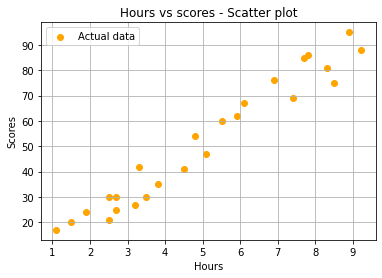

In [6]:
plt.scatter(df['Hours'],df['Scores'],color='orange',label='Actual data')
plt.title('Hours vs scores - Scatter plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid()
plt.show()

In [7]:
x = df[['Hours']]
y = df['Scores']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [8]:
print(x.shape)
print(y.shape)

(25, 1)
(25,)


In [9]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [10]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### Model building

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(x,y)
print("Training complete.")
# model.fit(x,y) - ML model is getting trained on the (x,y) data

Training complete.


In [13]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [14]:
# generate prediction
ypred = model.predict(x)
print(ypred)

[26.92318188 52.3402707  33.76624426 85.57800223 36.69898527 17.14737849
 92.4210646  56.25059205 83.62284155 28.87834256 77.75735951 60.16091341
 46.47478866 34.74382459 13.23705714 89.48832358 26.92318188 21.05769985
 62.11607409 74.8246185  28.87834256 49.40752968 39.63172629 69.9367168
 78.73493985]


In [15]:
df['y_pred'] = ypred
df.head()

,Hours,Scores,y_pred
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


In [16]:
# For Regression models, model.score(), returns R2_Score
print('Model_Score',model.score(x,y))

Model_Score 0.9529481969048356


In [17]:
#Compute m and c values
# Y_pred = mx + c
m = model.coef_
c = model.intercept_
print('Coefficient or Slope',m)
print('Intercept or Constant',c)

Coefficient or Slope [9.77580339]
Intercept or Constant 2.48367340537321


In [18]:
# Y_pred = mx + c
df['y_pred_eqn'] = m*df['Hours'] + c
df.head()

,Hours,Scores,y_pred,y_pred_eqn
0,2.5,21,26.923182,26.923182
1,5.1,47,52.340271,52.340271
2,3.2,27,33.766244,33.766244
3,8.5,75,85.578002,85.578002
4,3.5,30,36.698985,36.698985


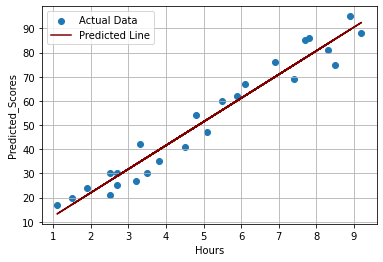

In [19]:
plt.scatter(df['Hours'],df['Scores'],label='Actual Data')
plt.plot(df['Hours'],df['y_pred'],color='maroon',label='Predicted Line')
plt.xlabel('Hours')
plt.ylabel('Predicted_Scores')
plt.grid()
plt.legend()
plt.show()

In [20]:
df.head()

,Hours,Scores,y_pred,y_pred_eqn
0,2.5,21,26.923182,26.923182
1,5.1,47,52.340271,52.340271
2,3.2,27,33.766244,33.766244
3,8.5,75,85.578002,85.578002
4,3.5,30,36.698985,36.698985


### Compute the equation matrix for regression

In [21]:
df['y_avg'] = df['Scores'].mean()
df['SSE'] = (df['Scores'] - df['y_pred'])**2      # SSE = sum of squared Error
df['SSR'] = (df['y_pred'] - df['y_avg'])**2  # SSR = Regression sum of square 
df.head()

,Hours,Scores,y_pred,y_pred_eqn,y_avg,SSE,SSR
0,2.5,21,26.923182,26.923182,51.48,35.084084,603.037316
1,5.1,47,52.340271,52.340271,51.48,28.518491,0.740066
2,3.2,27,33.766244,33.766244,51.48,45.782061,313.777143
3,8.5,75,85.578002,85.578002,51.48,111.894131,1162.673756
4,3.5,30,36.698985,36.698985,51.48,44.876404,218.478396


In [22]:
sst = df['SSE'].sum() + df['SSR'].sum()
print('SST',sst)
mse  =  df['SSE'].mean()
mae = abs(df['Scores'] - df['y_pred']).mean()
r2_score = 1 - df['SSE'].sum()/sst
print('MAE',mae)
print('MSE',mse)
print('RMSE',np.sqrt(mse))
print('R2_score',r2_score)
print('Model_Score',model.score(x,y))

SST 15346.239999999989
MAE 4.972805319866374
MSE 28.88273050924547
RMSE 5.37426557859262
R2_score 0.9529481969048355
Model_Score 0.9529481969048356


In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [24]:
mae = mean_absolute_error(y,ypred)
mse = mean_squared_error(y,ypred)
rmse = np.sqrt(mean_squared_error(y,ypred))
r2s = r2_score(y,ypred)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',model.score(x,y))

MAE 4.972805319866375
MSE 28.882730509245466
RMSE 5.374265578592619
R2_score 0.9529481969048356
Model_Score 0.9529481969048356


In [25]:
# Predictions for a specific value using LinReg Model
print(m,c)

[9.77580339] 2.48367340537321


In [26]:
ypred_x = model.predict([[9.25]])
print(ypred_x)
ypred_y = m*9.25 + c
print(ypred_y)

[92.90985477]
[92.90985477]


D:\Users\avani\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
